## SQL Queries used to extract data
    SELECT * FROM city_data WHERE city = 'Long Beach';
    SELECT * FROM city_data WHERE city = 'Austin';
    SELECT * FROM city_data where city = 'San Diego';
    SELECT * FROM global_data

## Outline of steps 
1. Ran SQL queries, found the cities I lied and downloaded respective csv files
2. Added column called moving_avg_10yrs in both global_data and city_data csv files
2. Since the chosen city data had fewer years worth of data compared to global, removed some rows to match the global data shape
3. Calculated MA by the formula AVERAGE(D2:D12) and applied across the column moving_avg_10yrs

In [10]:
#Imports
import csv
import numpy as np
from pylab import *

In [5]:
def get_temperature_data(filename):
    data_file = np.genfromtxt(filename , delimiter=',',names=True,dtype=None)
    moving_avg_data = data_file['moving_avg_10yrs'][~np.isnan(data_file['moving_avg_10yrs'])]
    return moving_avg_data

In [6]:
long_beach_file_path = r'C:\Users\remya\Downloads\modified_city_data.csv'
lb_data_MA = get_temperature_data(long_beach_file_path)
print (lb_data_MA)
global_file_path = r'C:\Users\remya\Downloads\modified_global_data.csv'
global_data_MA = get_temperature_data(global_file_path)
print (global_data_MA )



[ 16.01545455  15.98909091  16.10454545  16.16909091  16.17272727
  16.18909091  16.19545455  16.22545455  16.33818182  16.34909091  16.38
  16.39909091  16.43454545  16.33272727  16.28181818  16.21818182
  16.16636364  16.14636364  16.13272727  16.01818182  15.95272727
  15.80363636  15.79636364  15.70818182  15.72        15.68909091  15.79
  15.75        15.73        15.68909091  15.74818182  15.77454545
  15.88363636  15.86545455  15.89181818  15.81636364  15.83363636
  15.80090909  15.77454545  15.77545455  15.75181818  15.76272727
  15.75636364  15.70727273  15.72272727  15.80727273  15.89090909
  15.92363636  15.88636364  15.86727273  15.83090909  15.86181818
  15.76454545  15.70090909  15.70909091  15.73545455  15.67181818
  15.59636364  15.56272727  15.59818182  15.61545455  15.62        15.58545455
  15.59090909  15.62090909  15.65181818  15.65090909  15.72545455
  15.79363636  15.83727273  15.84        15.89        16.04272727
  16.03363636  16.00636364  16.12363636  16.13   

In [13]:
# Plot line chart

def plot_temperature_trend(city_data_MA, city):
    t = arange(1859, 2014, 1)
    plot(t, city_data_MA, label= city)
    plot(t, global_data_MA ,  label='Global')
    legend(loc='best') 
    xlabel('Years')
    ylabel('Moving Avg for 10 years')
    title('Exploring Weather trend ' + city + ' Vs Global')
    show()

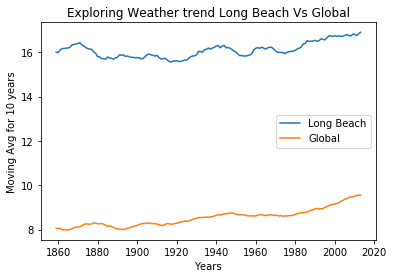

In [14]:
# Plot line chart for Long Beach
plot_temperature_trend(lb_data_MA, 'Long Beach')

## Observations from the chart
 1. Temperatures at the city level and globally are on the rise
 2. The trend shows slow but consistent increase over the last 200 years
 3. Moving averages for the city (around 16) is significantly higher than the global value (around 8). 
 4. It suggests that city's temperature is consitently higher than the global avaerage
 5. Since the late 1900s, the temperatures show only upward trend unlike earlier times


In [51]:
#  What's the correlation coefficient?
combined_value = np.stack((lb_data_MA, global_data_MA))  #can also use np.column_stack
print (np.corrcoef(combined_value))
print (np.correlate(lb_data_MA, global_data_MA))

[[ 1.          0.76380118]
 [ 0.76380118  1.        ]]
[ 21331.83645038]


In [ ]:
# Can you estimate the average temperature in your city based on the average global temperature?
# https://knowledge.udacity.com/questions/20433 - start here


In [16]:
# Data from other favorite cities
san_diego_file_path = r'C:/Users/remya/Downloads/san_diego_weather_data.csv'
sd_data_MA = get_temperature_data(san_diego_file_path)
print (sd_data_MA.shape)
austin_file_path = r'C:/Users/remya/Downloads/austin_tx_weather_data.csv'
austin_data_MA = get_temperature_data(austin_file_path)
print (austin_data_MA.shape )

(155,)
(184,)


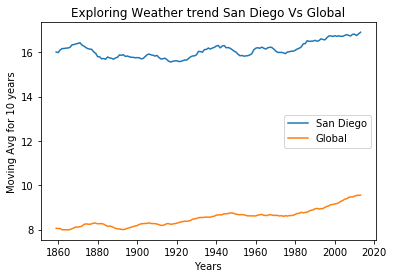

In [17]:
# Line chart for San Diego, CA
plot_temperature_trend(sd_data_MA, 'San Diego')
# Observations - San Diego's average is similar to that of Long Beach. 

(155,)


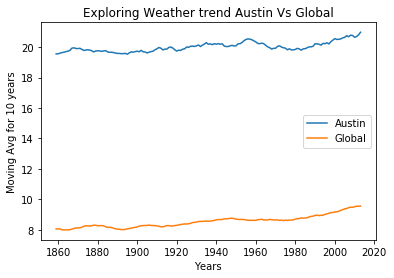

In [18]:
# Line chart for Austin, TX
print(austin_data_MA[29:].shape) # shape adjusted to match that of global data for plotting (184 - 29 = 155)
plot_temperature_trend(austin_data_MA[29:] , 'Austin')
# Observations - Austin's average is even higher and is above 20 